<a href="https://colab.research.google.com/github/junduk123/Machine-Learning-Task/blob/main/Task3/CreditDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Mengatur path file
file_path = '/content/drive/MyDrive/Dataset/CreditDataset.csv'

# Membaca dataset sebagai DataFrame
data = pd.read_csv(file_path)
df = pd.read_csv(file_path)

In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load the dataset (replace with your path or use Colab's file upload feature if running in Colab)
#credit_df = pd.read_csv('/path/to/your/CreditDataset.csv')  # Update this path as needed
# instead of the above line, use the below line
credit_df = data # Assign the 'data' DataFrame to 'credit_df'

In [14]:
# Strip any extra whitespace from column names (common issue in some datasets)
credit_df.columns = credit_df.columns.str.strip()

In [15]:
# Split features and target
X = credit_df.drop(columns=['Class'])
y = credit_df['Class']

In [16]:
# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [17]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [19]:
# Build preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

In [20]:
# Create pipeline with RandomForest classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [21]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['x2', 'x5', 'x8', 'x11', 'x13', 'x16', 'x18'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['x1', 'x3', 'x4', 'x6', 'x7', 'x9', 'x10', 'x12', 'x14', 'x15', 'x17',
       'x19', 'x20'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [22]:
# Make predictions
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

In [23]:
# Evaluate model with various metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_prob))

Accuracy: 0.77

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.95      0.85       209
           1       0.75      0.36      0.49        91

    accuracy                           0.77       300
   macro avg       0.76      0.66      0.67       300
weighted avg       0.77      0.77      0.74       300

AUC Score: 0.8013302486986696


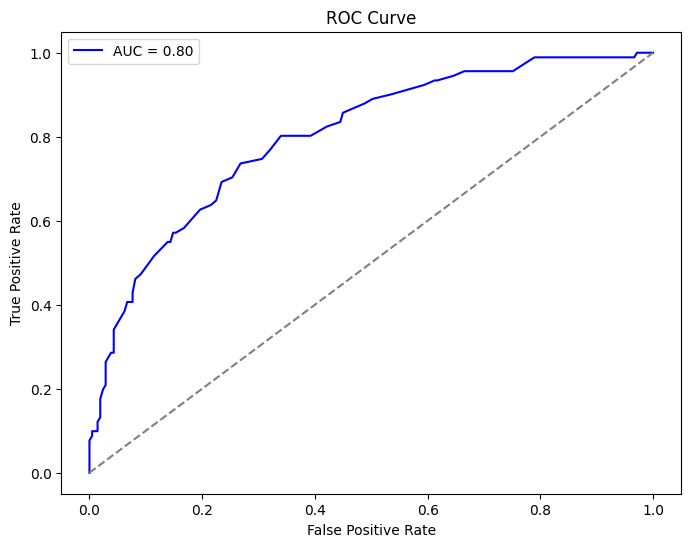

In [24]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc_score(y_test, y_prob):.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

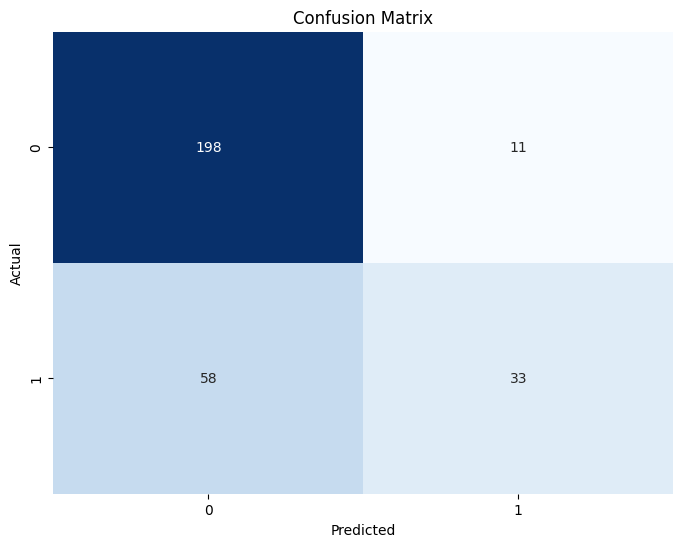

In [25]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()